In [ ]:
# https://www.researchgate.net/post/How_to_generate_the_phylogenetic_tree_if_I_have_distance_matrix_rather_than_alignment

In [16]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

In [2]:
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

(150, 2)


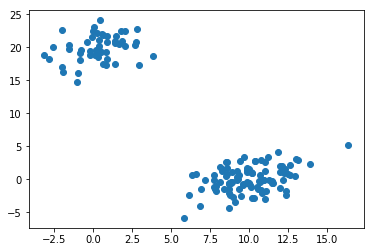

In [4]:
# generate two clusters: a with 100 points, b with 50:
np.random.seed(4711)  # for repeatability of this tutorial
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
X = np.concatenate((a, b),)
print(X.shape)  # 150 samples with 2 dimensions
plt.scatter(X[:,0], X[:,1])
plt.show()

In [10]:
X

array([[  9.21188,  -0.15189],
       [  8.88937,  -0.33937],
       [ 10.7684 ,   2.95245],
       [  8.24213,   1.29095],
       [  5.7967 ,  -5.83777],
       [  6.34993,   0.6396 ],
       [  8.10571,  -0.45887],
       [  8.72085,  -4.40444],
       [  8.83501,  -0.39166],
       [ 10.40061,   2.71241],
       [ 11.95503,   1.98603],
       [  8.50142,   0.5035 ],
       [  9.23359,   1.30693],
       [ 12.27768,   1.62764],
       [ 10.95902,  -0.12752],
       [  8.72437,  -0.73102],
       [  9.64949,   3.41989],
       [ 11.49912,  -0.55113],
       [ 11.48256,  -0.28623],
       [  8.5874 ,   1.66814],
       [ 11.9557 ,  -1.27351],
       [  9.85622,   1.08989],
       [ 10.11831,   1.08458],
       [  7.76042,   0.63747],
       [ 10.99794,  -2.93747],
       [  6.9085 ,  -1.44868],
       [  7.85787,  -0.99148],
       [  6.12508,  -2.44306],
       [ 10.61144,  -0.23623],
       [ 11.09217,  -1.69984],
       [  7.15907,  -0.12267],
       [ 10.73784,  -1.63561],
       [

In [5]:
# generate the linkage matrix
Z = linkage(X, 'ward')

In [6]:
print(Z.shape)

(149, 4)


In [7]:
Z

array([[  52.     ,   53.     ,    0.04151,    2.     ],
       [  14.     ,   79.     ,    0.05914,    2.     ],
       [  33.     ,   68.     ,    0.07107,    2.     ],
       [  17.     ,   73.     ,    0.07137,    2.     ],
       [   1.     ,    8.     ,    0.07543,    2.     ],
       [  85.     ,   95.     ,    0.10928,    2.     ],
       [ 108.     ,  131.     ,    0.11007,    2.     ],
       [   9.     ,   66.     ,    0.11302,    2.     ],
       [  15.     ,   69.     ,    0.11429,    2.     ],
       [  63.     ,   98.     ,    0.1212 ,    2.     ],
       [ 107.     ,  115.     ,    0.12167,    2.     ],
       [  65.     ,   74.     ,    0.1249 ,    2.     ],
       [  58.     ,   61.     ,    0.14028,    2.     ],
       [  62.     ,  152.     ,    0.1726 ,    3.     ],
       [  41.     ,  158.     ,    0.1779 ,    3.     ],
       [  10.     ,   83.     ,    0.18635,    2.     ],
       [ 114.     ,  139.     ,    0.20419,    2.     ],
       [  39.     ,   88.     ,

In [8]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(X))
c

0.98001483875742679

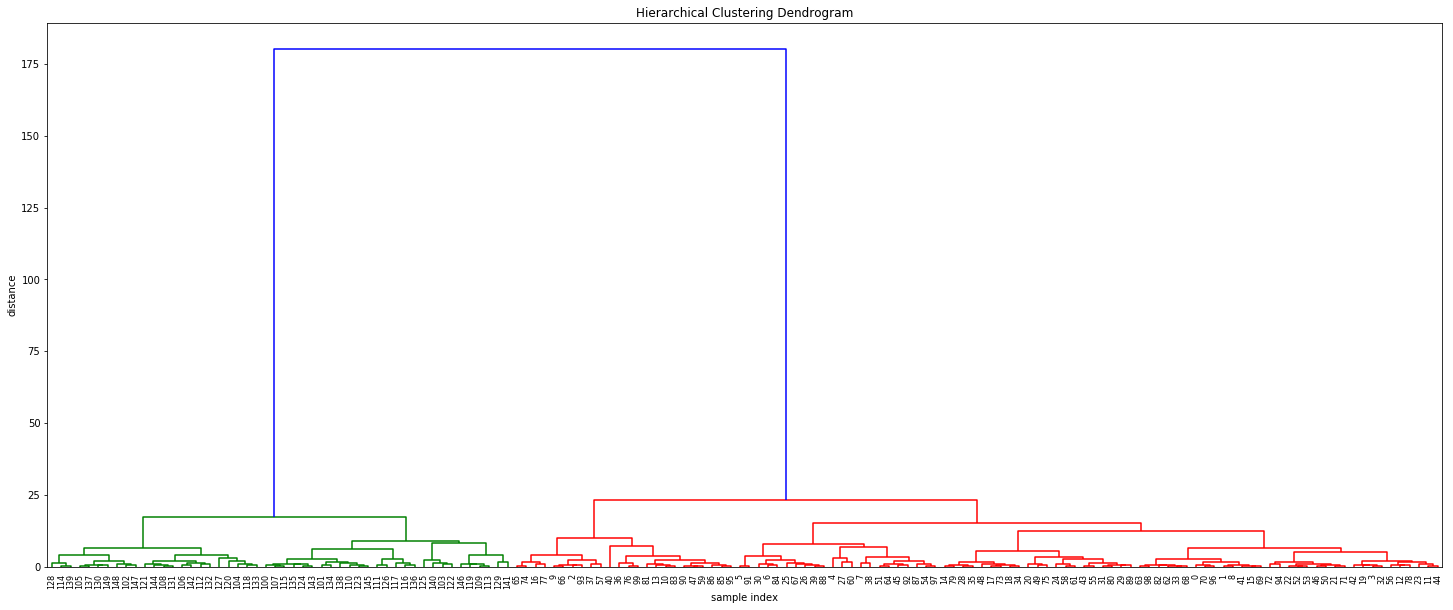

In [9]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [ ]:
# https://stackoverflow.com/questions/29022451/dendrogram-through-scipy-given-a-similarity-matrix
# https://stackoverflow.com/questions/41416498/dendrogram-or-other-plot-from-distance-matrix

In [11]:
SimMatrix = [[ 0.,0.09259259,  0.125     ,  0.        ,  0.08571429],
   [ 0.09259259,  0.        ,  0.05555556,  0.        ,  0.05128205],
   [ 0.125     ,  0.05555556,  0.        ,  0.03571429,  0.05882353],
   [ 0.        ,  0.        ,  0.03571429,  0.        ,  0.        ],
   [ 0.08571429,  0.05128205,  0.05882353,  0.        ,  0.        ]]

In [12]:
import scipy.spatial.distance as ssd
distVec = ssd.squareform(SimMatrix)

In [13]:
distVec

array([ 0.09259,  0.125  ,  0.     ,  0.08571,  0.05556,  0.     ,
        0.05128,  0.03571,  0.05882,  0.     ])

In [17]:
mylinkage = linkage(1 - distVec)

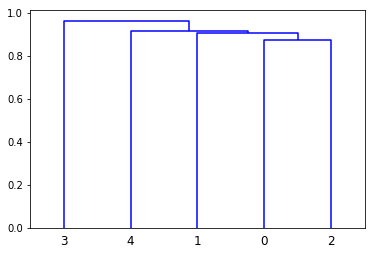

In [18]:
dendro  = dendrogram(mylinkage)

In [22]:
import sys
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


def proc_data(data_file_name, data_label_name):

    data_label = []
    for line in open(data_label_name):
        data_label.append(line.rstrip())

    nitem = len(data_label)
    data_matrix = np.zeros([nitem, nitem])
    label_index = {x:i for i,x in enumerate(data_label)}

    for line in open(data_file_name):
        data = line.rstrip().split('\t')
        item1, item2, dist = data[0], data[1], float(data[-1])
        if item1 not in label_index or item2 not in label_index:
            continue
        idx1 = label_index[item1]
        idx2 = label_index[item2]
        data_matrix[idx1][idx2] = 1 - dist
        data_matrix[idx2][idx1] = 1 - dist

    return data_matrix, data_label


In [67]:
data_matrix, data_label = proc_data("distance_1000g.list", "order_1000g.26.list")

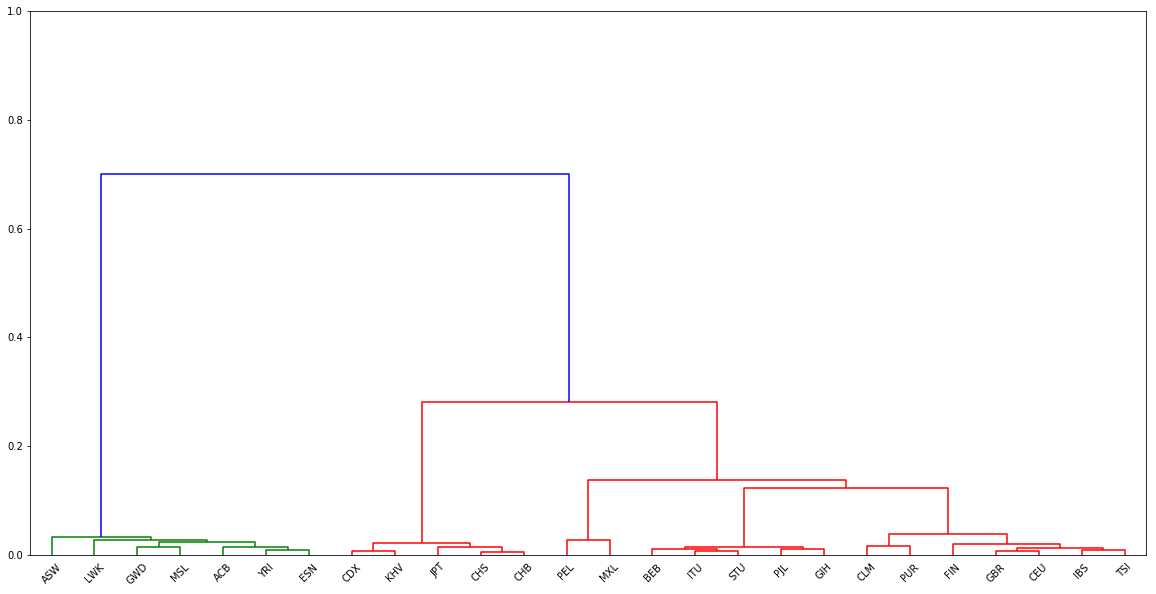

In [68]:
# fig, ax = plt.subplots()
plt.figure(figsize=(20,10))
distVec = ssd.squareform(data_matrix)
mylinkage = linkage(distVec, 'ward')
dendrogram(mylinkage, labels=data_label)
# plt.ylim(0,0.03) 
plt.ylim(0,1)
# ax.set_xt1icks(np.arange(len(data_label)))
# ax.set_xticklabels(data_label, minor=False)

plt.show()

In [71]:
min(distVec)

0.0060095301639999654

In [65]:
data_matrix, data_label = proc_data("distance_pacs.list", "order_pacs.30c.list")

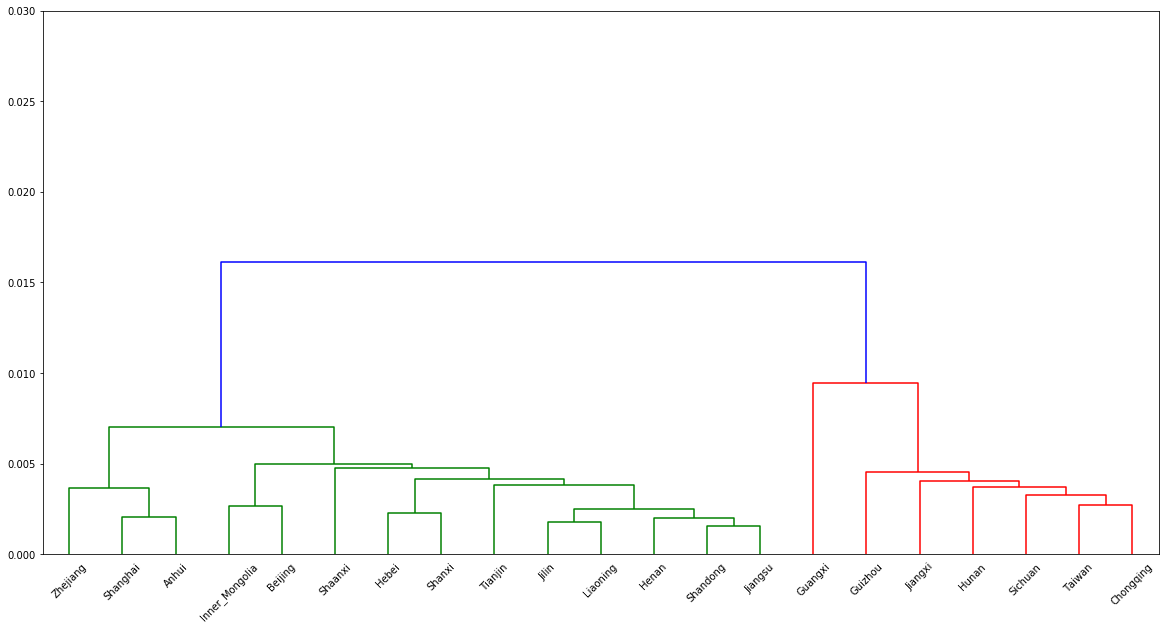

In [66]:
# fig, ax = plt.subplots()
plt.figure(figsize=(20,10))
distVec = ssd.squareform(data_matrix)
mylinkage = linkage(distVec, 'ward')
dendrogram(mylinkage, labels=data_label)
plt.ylim(0,0.03) 
# plt.ylim(0,1)
# ax.set_xt1icks(np.arange(len(data_label)))
# ax.set_xticklabels(data_label, minor=False)

plt.show()


In [26]:
data_matrix

array([[ 0.     ,  0.01696,  0.02983,  0.03054,  0.02678,  0.02854,
         0.02854,  0.15033,  0.15739,  0.15658,  0.15246,  0.16002,
         0.14416,  0.14817,  0.1483 ,  0.14766,  0.14726,  0.19904,
         0.1954 ,  0.19875,  0.19738,  0.19908,  0.19138,  0.15127,
         0.12619,  0.10825],
       [ 0.01696,  0.     ,  0.01879,  0.01743,  0.01287,  0.01465,
         0.01995,  0.19202,  0.20061,  0.19965,  0.19415,  0.20323,
         0.18241,  0.18611,  0.18526,  0.1844 ,  0.18464,  0.23474,
         0.23136,  0.23506,  0.23387,  0.23562,  0.23344,  0.19367,
         0.1661 ,  0.14478],
       [ 0.02983,  0.01879,  0.     ,  0.01491,  0.01815,  0.0206 ,
         0.02677,  0.23305,  0.24303,  0.24198,  0.23533,  0.24517,
         0.2196 ,  0.22307,  0.22098,  0.21994,  0.22065,  0.26652,
         0.26322,  0.26674,  0.26569,  0.26732,  0.26769,  0.23032,
         0.20348,  0.18061],
       [ 0.03054,  0.01743,  0.01491,  0.     ,  0.01568,  0.01807,
         0.02573,  0.24224,  